In [130]:
import pandas as pd
import numpy as np
df=pd.read_csv('titanic/train.csv')

## data preparation

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
discard=["Name","Embarked","Cabin","Ticket","PassengerId"]
pt=df.drop(discard,axis=1)
pt.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [132]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder();
pt["Sex"]=le.fit_transform(pt["Sex"])
pt.head()
pt=pt.fillna(pt["Age"].mean())
pt.head()
out_col=["Survived"]
x_data=pt.drop(out_col,axis=1)
y_data=pt[out_col]

## now defining function main part


In [8]:
import pandas as pd 

In [9]:
def entropy(col):
    counts=np.unique(col,return_counts=True)
    N=float(col.shape[0])
    ent=0;
    for ix in counts[1]:
        p=ix/N;
        ent+=(-1.0*p*np.log2(p))
    return ent

In [10]:
def divide_data(x_data,fkey,fval):
    x_left=pd.DataFrame([],columns=x_data.columns)
    x_right=pd.DataFrame([],columns=x_data.columns)
    for i in range(x_data.shape[0]):
        val=x_data[fkey].loc[i]
        if(val>fval):
            x_right=x_right.append(x_data.loc[i])
        else:
            x_left=x_left.append(x_data.loc[i])
          
    return x_left,x_right        

In [257]:
l,r=divide_data(pt[:10],'Sex',0.5)
print(l.head())
print(r.head())
pt.Survived
entropy(pt.Survived)

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
1       1.0     1.0  0.0  38.0    1.0    0.0  71.2833
2       1.0     3.0  0.0  26.0    0.0    0.0   7.9250
3       1.0     1.0  0.0  35.0    1.0    0.0  53.1000
8       1.0     3.0  0.0  27.0    0.0    2.0  11.1333
9       1.0     2.0  0.0  14.0    1.0    0.0  30.0708
   Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0       0.0     3.0  1.0  22.000000    1.0    0.0   7.2500
4       0.0     3.0  1.0  35.000000    0.0    0.0   8.0500
5       0.0     3.0  1.0  29.699118    0.0    0.0   8.4583
6       0.0     1.0  1.0  54.000000    0.0    0.0  51.8625
7       0.0     3.0  1.0   2.000000    3.0    1.0  21.0750


0.9607079018756469

In [11]:
def information_gain(x_data,fkey,fval):
    left,right=divide_data(x_data,fkey,fval)
    l,r=float(left.shape[0]/x_data.shape[0]),float(right.shape[0]/x_data.shape[0])
    if left.shape[0]==0 or right.shape[0]==0:
        return -1000000007;
    i_gain=entropy(x_data.Survived)-(l*entropy(left.Survived)+r*entropy(right.Survived))
   
    return i_gain;
    
#for fx in x_data.columns:
#    print(fx)
#    print(information_gain(pt,fx,pt[fx].mean()))


In [38]:
i_gain=information_gain(pt,'Sex',pt['Sex'].mean());
l,r=divide_data(pt,'Sex',pt['Sex'].mean())
print(l,r)
i_gain

     Survived  Pclass  Sex        Age  SibSp  Parch     Fare
1         1.0     1.0  0.0  38.000000    1.0    0.0  71.2833
2         1.0     3.0  0.0  26.000000    0.0    0.0   7.9250
3         1.0     1.0  0.0  35.000000    1.0    0.0  53.1000
8         1.0     3.0  0.0  27.000000    0.0    2.0  11.1333
9         1.0     2.0  0.0  14.000000    1.0    0.0  30.0708
..        ...     ...  ...        ...    ...    ...      ...
880       1.0     2.0  0.0  25.000000    0.0    1.0  26.0000
882       0.0     3.0  0.0  22.000000    0.0    0.0  10.5167
885       0.0     3.0  0.0  39.000000    0.0    5.0  29.1250
887       1.0     1.0  0.0  19.000000    0.0    0.0  30.0000
888       0.0     3.0  0.0  29.699118    1.0    2.0  23.4500

[314 rows x 7 columns]      Survived  Pclass  Sex        Age  SibSp  Parch     Fare
0         0.0     3.0  1.0  22.000000    1.0    0.0   7.2500
4         0.0     3.0  1.0  35.000000    0.0    0.0   8.0500
5         0.0     3.0  1.0  29.699118    0.0    0.0   8.4583


0.2176601066606142

## define the decision tree function (in programming launguage like python and java their is only object and no pointer so i can use best simple thing as explain below



In [54]:
class decision:
    def __init__(self,depth=0,max_depth=5):
        self.target=None;
        self.left=None;
        self.right=None;
        self.fkey=None;
        self.fval=None;
        self.depth=depth;
        self.max_depth=max_depth;
    def train(self,x_train):
        features=['Pclass','Sex','Age','SibSp','Parch','Fare']
        info_gain=[]
        for ix in features:
            i_gain=information_gain(x_train,ix,x_train[ix].mean());
            info_gain.append(i_gain);
        self.fkey=features[np.argmax(info_gain)]
        self.fval=x_train[self.fkey].mean()
        ##now i have to build a recursive function
        ## this thing i have to to for each case 
        l,r=divide_data(x_train,self.fkey,self.fval)
        l=l.reset_index(drop=True)
        r=r.reset_index(drop=True)
        if x_train.Survived.mean()>=0.5:
            self.target="survived"
        else:
            self.target="dead"
        ## base case
        if l.shape[0]==0 or r.shape[0]==0:
            return;
        if self.depth>=self.max_depth:
            return;
        ##recursive case:
        self.left=decision(depth=self.depth+1,max_depth=self.max_depth)
        self.left.train(l)
        self.right=decision(depth=self.depth+1,max_depth=self.max_depth)
        self.right.train(r)
        
    def predict(self,test):
        ##rec case
        if(test[self.fkey].mean()>self.fval):
            if self.right==None:
                return self.target
            return self.right.predict(test)
        else:
            if self.left==None:
                return self.target
            return self.left.predict(test)


            

In [55]:
split=int(0.7*pt.shape[0])
train_data=pt[:split]
test_data=pt[split:]
test_data=test_data.reset_index(drop=True)

In [56]:
d=decision()
d.train(train_data)

In [64]:
tot=0
pred=[]
for ix in range(test_data.shape[0]):
    pred.append(d.predict(test_data.loc[ix]))
    if pred[ix]=="survived" and test_data.iloc[ix]["Survived"]==1:
        tot+=1;
    elif pred[ix]=="dead"  and test_data.iloc[ix]["Survived"]==0:
        tot+=1    
print("accuracy ",tot/test_data.shape[0])

        


accuracy  0.8171641791044776


In [65]:
le=LabelEncoder();
pred=le.fit_transform(pred)

In [66]:
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

## using sklearn


In [98]:
newf=pd.read_csv('titanic/test.csv')
discard=["Name","Embarked","Cabin","Ticket"]
test_d=newf.drop(discard,axis=1)
test_d=test_d.fillna(test_d["Age"].mean())
le=LabelEncoder();
test_d['Sex']=le.fit_transform(test_d['Sex'])
test_d.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.5,0,0,7.8292
1,893,3,0,47.0,1,0,7.0000
2,894,2,1,62.0,0,0,9.6875
3,895,3,1,27.0,0,0,8.6625
4,896,3,0,22.0,1,1,12.2875


In [152]:
from sklearn.tree import DecisionTreeClassifier
t=DecisionTreeClassifier(max_depth=5)
inp_col=['Pclass','Sex','Age','SibSp','Parch','Fare']
out_col=['Survived']
t.fit(pt[inp_col],pt[out_col])
pred=t.predict(test_d[inp_col])
#t.score(test_data[inp_col],test_data[out_col])
header_file='PassengerId,Survived'
with open('newcsv.csv','w+') as file:
    file.write(header_file)
    file.write('\n')
    for i in range(pred.shape[0]):   
        file.write(str(test_d['PassengerId'].loc[i]))
        file.write(',')
        file.write(str(pred[i]))
        file.write('\n')
        
  

In [153]:
ll=pd.read_csv('newcsv.csv')
ll.head()
from sklearn import tree

In [154]:
ll.shape

(418, 2)

In [155]:
test_d.shape

(418, 7)

In [180]:
#Image(graph1.create_png())
text_representation = tree.export_text(t)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- feature_4 <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  1.50
|   |   |   |   |--- class: 0
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_5 <= 28.86
|   |   |   |   |--- feature_5 <= 28.23
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  28.23
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_5 >  28.86
|   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |--- class: 1
|   |--- feature_0 >  2.50
|   |   |--- feature_5 <= 23.35
|   |   |   |--- feature_2 <= 36.50
|   |   |   |   |--- feature_5 <= 7.89
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_5 >  7.89
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  36.50
|   |   |   |   |--- feature_2 <= 55.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  55.00
|

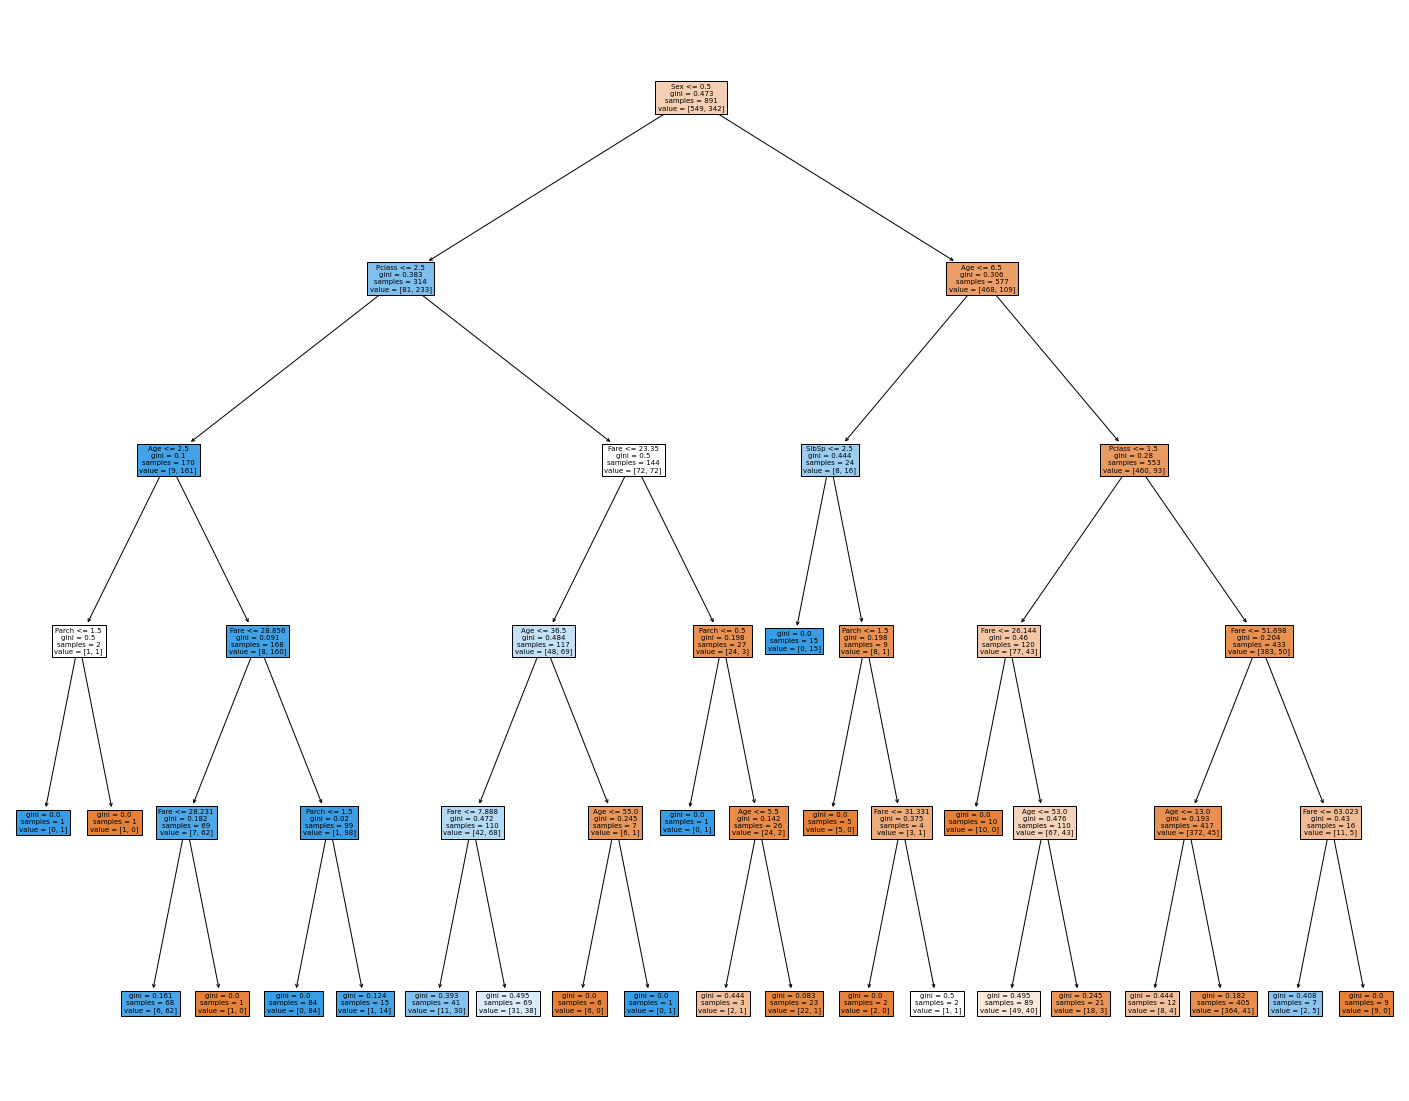

In [184]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(t, 
                   feature_names=features,  
                   filled=True)